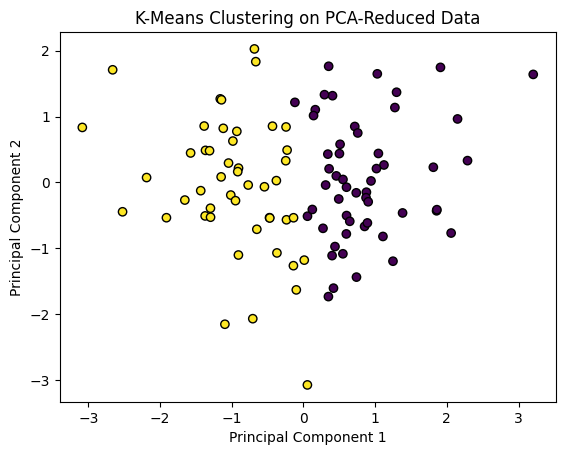

In [5]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

class PCAFromScratch:
    """PCA implementation for dimensionality reduction from scratch.

    This class reduces data to a specified number of principal components
    by calculating the covariance matrix and performing eigen decomposition.
    """
    def transform(self, X, n_components):
        """Reduce X to 'n_components' principal components.

        Parameters:
        -----------
        X: np.ndarray
            The dataset with shape (n_samples, n_features)
        n_components: int
            The number of components to keep

        Returns:
        --------
        X_transformed: np.ndarray
            Dataset projected onto the top 'n_components' principal components.
        """
        # Step 1: Center the data (mean normalization)
        X_meaned = X - np.mean(X, axis=0)

        # Step 2: Calculate the covariance matrix
        covariance_matrix = np.cov(X_meaned, rowvar=False)

        # Step 3: Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Step 4: Sort eigenvalues and eigenvectors in descending order
        sorted_idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_idx]
        eigenvectors = eigenvectors[:, sorted_idx]

        # Step 5: Select the top 'n_components' eigenvectors
        selected_eigenvectors = eigenvectors[:, :n_components]

        # Step 6: Transform the data
        X_transformed = np.dot(X_meaned, selected_eigenvectors)

        return X_transformed

# Example usage
if __name__ == "__main__":
    # Generate synthetic 3D data
    np.random.seed(42)
    data = np.random.randn(100, 3)

    # Reduce to 2 dimensions using PCA
    pca = PCAFromScratch()
    data_reduced = pca.transform(data, n_components=2)

    # Now use K-Means to cluster the reduced data
    kmeans = KMeans(n_clusters=2, max_iter=100, random_state=42)
    labels = kmeans.fit_predict(data_reduced)

    # Plot the clustered data
    plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=labels, cmap='viridis', edgecolor='k')
    plt.title("K-Means Clustering on PCA-Reduced Data")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()


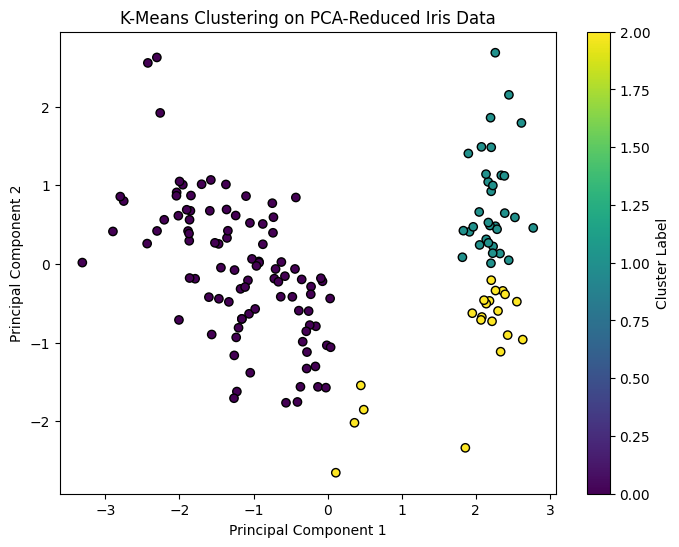

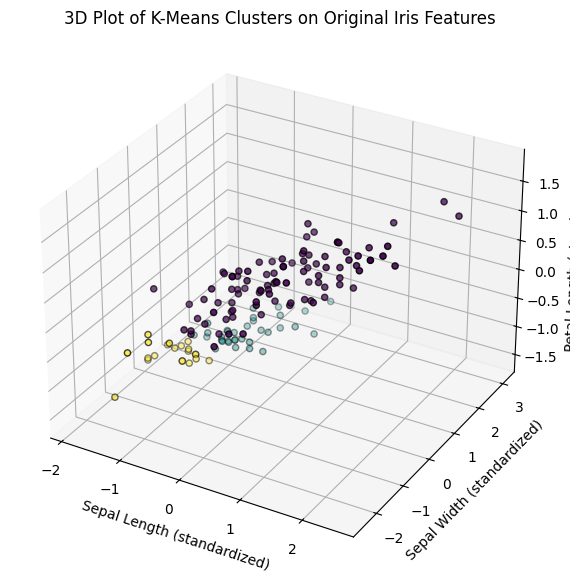

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

class PCAFromScratch:
    """PCA implementation for dimensionality reduction from scratch."""
    def transform(self, X, n_components):
        # Step 1: Center the data
        X_meaned = X - np.mean(X, axis=0)

        # Step 2: Calculate covariance matrix
        covariance_matrix = np.cov(X_meaned, rowvar=False)

        # Step 3: Eigen decomposition
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Step 4: Sort eigenvalues and eigenvectors in descending order
        sorted_idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_idx]
        eigenvectors = eigenvectors[:, sorted_idx]

        # Step 5: Select top n_components eigenvectors
        selected_eigenvectors = eigenvectors[:, :n_components]

        # Step 6: Transform the data
        X_transformed = np.dot(X_meaned, selected_eigenvectors)

        return X_transformed

# Example usage with the Iris dataset
if __name__ == "__main__":
    # Load and standardize the Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Reduce dimensions to 2D using PCA
    pca = PCAFromScratch()
    X_reduced = pca.transform(X_scaled, n_components=2)

    # Apply K-Means clustering to the reduced data
    kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
    labels = kmeans.fit_predict(X_reduced)

    # Visualization in 2D
    plt.figure(figsize=(8, 6))
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, cmap='viridis', edgecolor='k')
    plt.title("K-Means Clustering on PCA-Reduced Iris Data")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label="Cluster Label")
    plt.show()

    # Optional 3D Visualization
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=labels, cmap='viridis', edgecolor='k')
    ax.set_title("3D Plot of K-Means Clusters on Original Iris Features")
    ax.set_xlabel("Sepal Length (standardized)")
    ax.set_ylabel("Sepal Width (standardized)")
    ax.set_zlabel("Petal Length (standardized)")
    plt.show()
